# 타이타닉 생존자 예측
- test, gender 파일들은 train 파일의 결과<br>
1) 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./data/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


2) 결손치 확인 / 정보 확인

In [3]:
titanic_df.info()
# Age, Cabin, Embarked 행에 결손값이 있음을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
titanic_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
titanic_df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

3) 결손치 처리

In [7]:
# Age는 평균으로 대체하기에 무리가 없는 데이터
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)
# Cabin, Embarked는 최빈값으로 대체하겠음
titanic_df.Cabin.fillna(titanic_df.Cabin.describe()['top'], inplace=True)
titanic_df.Embarked.fillna(titanic_df.Embarked.describe()['top'], inplace=True)
print('남아있는 NaN값 개수:',titanic_df.isnull().sum().sum() )

남아있는 NaN값 개수: 0


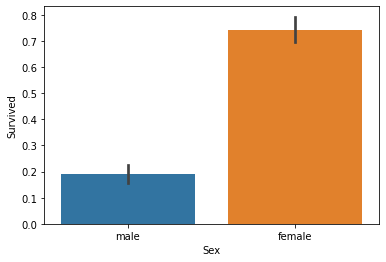

In [8]:
# 성별 - 생존
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)
plt.show()

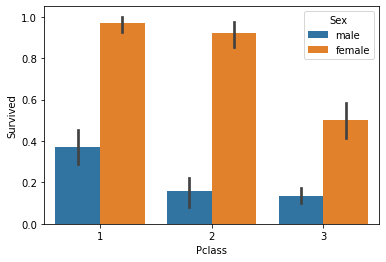

In [9]:
# 클래스 - 생존, hue = '성별'
sns.barplot(x = 'Pclass', y = 'Survived', hue='Sex', data = titanic_df)
plt.show()

4) 카테고리화

In [10]:
bins = [1, 5, 12, 18, 25, 35, 60, 150]
labels = ['Baby','Child','Teenager','Student','Adult','Middle Age','Senior']

In [12]:
cats = pd.cut(titanic_df.Age, bins, labels=labels)
titanic_df['Age_cat'] = cats

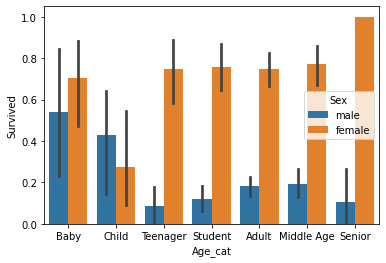

In [13]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df)
plt.show()

5) 데이터 전처리

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
features = ["Cabin","Sex","Embarked"]
for feature in features:
    le = LabelEncoder()
    titanic_df[feature] = le.fit_transform(titanic_df[feature])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,145,2,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Middle Age
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,145,2,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,145,2,Adult


In [16]:
# 데이터 전처리에 필요한 함수
def fillna(df):
    df.Age.fillna(df.Age.mean(), inplace=True)
    df.Cabin.fillna(df.Cabin.describe()['top'], inplace=True)
    df.Embarked.fillna(df.Embarked.describe()['top'], inplace=True)
    df.Fare.fillna(df.Fare.mean(), inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 변수(Feature) 제거
def redundant_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def label_features(df):
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 위의 함수를 총망라
def transform_features(df):
    df = fillna(df)
    df = redundant_features(df)
    df = label_features(df)
    return df

6) 생존자 예측

In [17]:
titanic_df = pd.read_csv('./data/train.csv')
y_titanic_df = titanic_df['Survived']
# 정답열인 Survived 열 제거
X_titanic_df = titanic_df.drop('Survived', axis=1)
# 전처리 함수
X_titanic_df = transform_features(X_titanic_df)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    # x 데이터, y 데이터
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=11
)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
# y햇
dt_pred = dt_clf.predict(X_test)
print(f"DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred):.4f}")

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForestClassifier 정확도: {accuracy_score(y_test, rf_pred):.4f}")

# LogisticRegression  학습/예측/평가
lr_clf = RandomForestClassifier(random_state=11)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"RandomForestClassifier 정확도: {accuracy_score(y_test, lr_pred):.4f}")

# SupportVectorClassifier  학습/예측/평가
sv_clf = RandomForestClassifier(random_state=11)
sv_clf.fit(X_train, y_train)
sv_pred = sv_clf.predict(X_test)
print(f"SupportVectorClassifier 정확도: {accuracy_score(y_test, sv_pred):.4f}")

DecisionTreeClassifier 정확도: 0.7989
RandomForestClassifier 정확도: 0.8715
RandomForestClassifier 정확도: 0.8715
SupportVectorClassifier 정확도: 0.8715


In [29]:
# Stratified K-Fold 방식으로 교차 검증
from sklearn.model_selection import StratifiedKFold

def exec_skfold(clf, folds=5):
    skfold = StratifiedKFold(n_splits = folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(skfold.split(X_titanic_df, y_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 인덱스 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}' )

    mean_score = np.mean(scores)
    print(f"평균 정확도: {mean_score:.4f}")

In [30]:
# DecisionTreeClassifier 교차검증
exec_skfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7598
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.8315
교차 검증 3 정확도 : 0.7584
교차 검증 4 정확도 : 0.7978
평균 정확도: 0.7834


In [31]:
# RandomForestClassifier 교차검증
exec_skfold(rf_clf, folds=5)

교차 검증 0 정확도 : 0.7765
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8539
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8596
평균 정확도: 0.8115


In [32]:
# LogisticRegression 교차검증
exec_skfold(lr_clf, folds=5)

교차 검증 0 정확도 : 0.7765
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8539
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8596
평균 정확도: 0.8115


In [33]:
# SupportVectorClassifier 교차검증
exec_skfold(sv_clf, folds=5)

교차 검증 0 정확도 : 0.7765
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8539
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8596
평균 정확도: 0.8115


결정 트리 모델을 cross_val_score 함수를 이용하여 교차 검증

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f"평균 정확도: {np.mean(scores):.4f}")


교차 검증 0 정확도 : 0.7598
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.8315
교차 검증 3 정확도 : 0.7584
교차 검증 4 정확도 : 0.7978
평균 정확도: 0.7834


In [ ]:
GridSearchCV를 통하여 결정트리 모델의 최적 파라미터 도출

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_leaf':[1,5,8],
    'min_samples_split':[2,3,5] 
}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_:.4f}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도: {accuracy:.4f}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.7993
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8659
